1.	Tensor Manipulations & Reshaping

In [1]:
import tensorflow as tf

# 1. Create a random tensor of shape (4, 6)
tensor = tf.random.uniform(shape=(4, 6))
print("Original Tensor:\n", tensor)

# 2. Find its rank and shape
rank = tf.rank(tensor)
shape = tf.shape(tensor)
print("\nRank:", rank.numpy())
print("Shape:", shape.numpy())

# 3. Reshape to (2, 3, 4) and transpose to (3, 2, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print("\nReshaped Tensor Shape:", reshaped_tensor.shape)
print("Transposed Tensor Shape:", transposed_tensor.shape)

# 4. Broadcast a smaller tensor (1, 4) and add
small_tensor = tf.random.uniform(shape=(1, 4))
# Broadcasting will automatically match dimensions
# Let's expand dims of the smaller tensor to align (3, 2, 4)
broadcasted_addition = transposed_tensor + small_tensor
print("\nBroadcasted Addition Shape:", broadcasted_addition.shape)

Original Tensor:
 tf.Tensor(
[[0.73162234 0.8522334  0.850057   0.4191712  0.18213654 0.50087583]
 [0.5921682  0.2651719  0.9678438  0.0599798  0.19608998 0.1441698 ]
 [0.93914163 0.46975577 0.53217435 0.86438835 0.9343692  0.26263022]
 [0.71602464 0.769529   0.24442673 0.28921914 0.08122349 0.5612719 ]], shape=(4, 6), dtype=float32)

Rank: 2
Shape: [4 6]

Reshaped Tensor Shape: (2, 3, 4)
Transposed Tensor Shape: (3, 2, 4)

Broadcasted Addition Shape: (3, 2, 4)


2.	Loss Functions & Hyperparameter Tuning

MSE (Good Prediction): 0.0200
MSE (Less Confident Prediction): 0.1800
CCE (Good Prediction): 0.2231
CCE (Less Confident Prediction): 0.9163


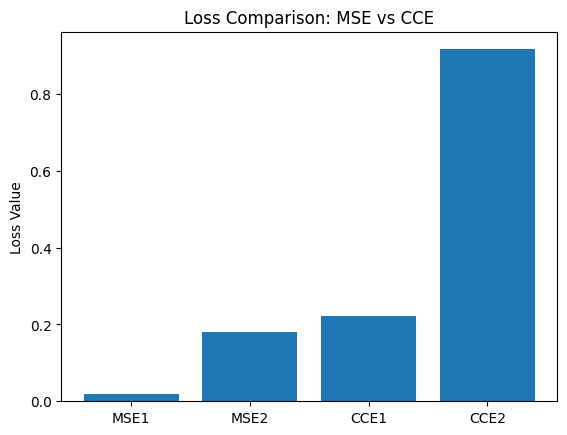

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1. Define true labels and predictions
y_true = tf.constant([[0, 1, 0]], dtype=tf.float32)  # One-hot true class = class 1
y_pred1 = tf.constant([[0.1, 0.8, 0.1]], dtype=tf.float32)  # Good prediction
y_pred2 = tf.constant([[0.3, 0.4, 0.3]], dtype=tf.float32)  # Less confident prediction

# 2. Compute losses
mse1 = tf.keras.losses.MeanSquaredError()(y_true, y_pred1).numpy()
mse2 = tf.keras.losses.MeanSquaredError()(y_true, y_pred2).numpy()

cce = tf.keras.losses.CategoricalCrossentropy()
cce1 = cce(y_true, y_pred1).numpy()
cce2 = cce(y_true, y_pred2).numpy()

# 3. Print loss values
print(f"MSE (Good Prediction): {mse1:.4f}")
print(f"MSE (Less Confident Prediction): {mse2:.4f}")
print(f"CCE (Good Prediction): {cce1:.4f}")
print(f"CCE (Less Confident Prediction): {cce2:.4f}")

# 4. Plot comparison as bar chart
labels = ['MSE1', 'MSE2', 'CCE1', 'CCE2']
loss_values = [mse1, mse2, cce1, cce2]

plt.bar(labels, loss_values)
plt.title('Loss Comparison: MSE vs CCE')
plt.ylabel('Loss Value')
plt.show()


3.	Train a Neural Network and Log to TensorBoard

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import datetime

# 1. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# 2. Build a simple neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with logging enabled
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=5,
          callbacks=[tensorboard_cb])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8766 - loss: 0.4283 - val_accuracy: 0.9591 - val_loss: 0.1338
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9643 - loss: 0.1234 - val_accuracy: 0.9714 - val_loss: 0.0950
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9762 - loss: 0.0777 - val_accuracy: 0.9707 - val_loss: 0.0905
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9830 - loss: 0.0574 - val_accuracy: 0.9751 - val_loss: 0.0807
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0413 - val_accuracy: 0.9766 - val_loss: 0.0739
